<a href="https://colab.research.google.com/github/Computer-CGuy/Area51ThemePark/blob/master/PBB_RED_2-Billinear-UPDATE1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch  
import matplotlib.pyplot as plt  
import numpy as np  
import torch.nn.functional as func  
import PIL.ImageOps  
from torch import nn  
from torchvision import datasets,transforms   
import requests  
from PIL import Image  
import torchvision.models as models
import os

In [0]:
cnn = models.alexnet(pretrained=True).cuda()
#256 x 256 x 3

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/checkpoints/alexnet-owt-4df8aa71.pth


In [0]:
class MulGRAD(torch.autograd.Function):
    @staticmethod
    def forward(ctx,input):
        return input
    @staticmethod
    def backward(ctx, grad_output):
        return grad_output*2

In [0]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(10,10)
        self.fc12 = nn.Linear(10,100)
        self.fc2 = nn.Linear(100,300)
        self.fc5 = nn.Linear(310,800)
        self.fc11 = nn.Linear(810,1100)
        self.fc6 = nn.Linear(1110,1500)
        self.fc7 = nn.Linear(1500,2000)
        self.fc13 = nn.Linear(2000,4000)
        self.fc14 = nn.Linear(4000,3072)
        self.fc8 = nn.Upsample(scale_factor=2, mode='nearest')
        self.fc9 = nn.Upsample(scale_factor=2, mode='bilinear')
        self.fc10 = nn.Upsample(scale_factor=2, mode='bilinear')
        # self.lstm = nn.LSTM(3,10,4)
        self.conv1 = torch.nn.Conv2d(3, 30, 1)
        self.conv2 = torch.nn.Conv2d(30, 60,4) 
        self.conv3 = torch.nn.ConvTranspose2d(60,30,4)
        self.conv4 = torch.nn.ConvTranspose2d(30,3,1)
        # self.fc6 = nn.Linear(1444, 3072)
        # self.m1 = MulGRAD()
    def forward(self, x, sig = False):
        x1 = x = nn.functional.leaky_relu(self.fc1(x))
        # x = torch.cat((x1, x), dim=1)
        
        # x = MulGRAD.apply(x)

        x = nn.functional.leaky_relu(self.fc12(x))
        # x = self.drop(x)

        # x = MulGRAD.apply(x)

        x = nn.functional.relu(self.fc2(x))

        # x = MulGRAD.apply(x)


        x = torch.cat((x1, x), dim=1)
        # print(X)
        # x = self.drop(x)
        # x = nn.functional.leaky_relu(self.fc3(x))
        # x = nn.functional.leaky_relu(self.fc4(x))
        x = (nn.functional.relu(self.fc5(x)))
        x = torch.cat((x1, x), dim=1)
        
        # x = MulGRAD.apply(x)

        x = (nn.functional.relu(self.fc11(x)))
        x = torch.cat((x1, x), dim=1)
        
        # x = MulGRAD.apply(x)


        x = (nn.functional.relu(self.fc6(x)))
        
        # x = MulGRAD.apply(x)
        
        x = (nn.functional.relu(self.fc7(x)))
        
        # x = MulGRAD.apply(x)

        x = (nn.functional.relu(self.fc13(x)))
        
        # x = MulGRAD.apply(x)

        x = (nn.functional.relu(self.fc14(x)))
        
        # x = MulGRAD.apply(x)

        # x = (nn.functional.leaky_relu(self.fc8(x)))
        # x = (nn.functional.relu(self.fc6(x)))
        # x = self.drop(x)
        # x = (self.fc5(x))
        x = torch.reshape(x,(3,32,32)).unsqueeze(0)
        
        # x = MulGRAD.apply(x)

        x = nn.functional.leaky_relu(self.fc8(x)) #56
        
        # x = MulGRAD.apply(x)
        
        

        x = nn.functional.relu(self.conv1(x))
        
        # x = MulGRAD.apply(x)

        x = nn.functional.relu(self.fc9(x)) #112
       
        # x = MulGRAD.apply(x)

        x = nn.functional.relu(self.conv2(x))
      
        # x = MulGRAD.apply(x)
        
        x = nn.functional.relu(self.fc10(x))  #224
      
        # x = MulGRAD.apply(x)

        x = nn.functional.relu(self.conv3(x))
        # x = MulGRAD.apply(x)

        x = nn.functional.relu(self.conv4(x))
        # x = MulGRAD.apply(x)

        # print(x.shape)
        if(sig==True):
          x = torch.sigmoid(x)
        #x = self.fc5(x)
        return x

In [0]:

cnn.eval()
cnn.trainable = False
model = Net().cuda()
_ = model.train()


In [0]:
## STATUS Centered around output
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.00001)

In [0]:
## STATUS Donot use SGD Loss Increases
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.00001,momentum=0.9)

In [0]:
## STATUS Less Loss 0.69 in first epoch, early exiting 
criterion = nn.L1Loss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.00001)

In [0]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.00001)

# optimizer = torch.optim.SGD(model.parameters(),lr=0.00001,momentum=0.9)


In [0]:
model

Net(
  (fc1): Linear(in_features=10, out_features=10, bias=True)
  (fc12): Linear(in_features=10, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=300, bias=True)
  (fc5): Linear(in_features=310, out_features=800, bias=True)
  (fc11): Linear(in_features=810, out_features=1100, bias=True)
  (fc6): Linear(in_features=1110, out_features=1500, bias=True)
  (fc7): Linear(in_features=1500, out_features=2000, bias=True)
  (fc13): Linear(in_features=2000, out_features=4000, bias=True)
  (fc14): Linear(in_features=4000, out_features=3072, bias=True)
  (fc8): Upsample(scale_factor=2.0, mode=nearest)
  (fc9): Upsample(scale_factor=2.0, mode=bilinear)
  (fc10): Upsample(scale_factor=2.0, mode=nearest)
  (conv1): Conv2d(3, 30, kernel_size=(1, 1), stride=(1, 1))
  (conv2): Conv2d(30, 60, kernel_size=(4, 4), stride=(1, 1))
  (conv3): ConvTranspose2d(60, 30, kernel_size=(4, 4), stride=(1, 1))
  (conv4): ConvTranspose2d(30, 3, kernel_size=(1, 1), stride=(1, 1))
)

In [0]:
import cv2
from google.colab.patches import cv2_imshow
def empty(data,start,step):
  p = []
  for x in range(start,start+(10*step),step):
    if(x==data):
      p.append(1)
    else:
      p.append(0)
  return p

In [0]:
def empty2(data):
  p=[]
  for x in range(0,1000):
    if(x==data):
      p.append(1)
    else:
      p.append(0)
  return p

In [0]:
num = 0

h = 0
i=0

In [0]:
folder = "AlexNetConv"

In [0]:
save = False

In [0]:
cnn.trainable = False
cnn.requires_grad_=False
for param in cnn.parameters():
  param.requires_grad = False
  param.trainable = False
for param in model.parameters():
  param.requires_grad = True

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2973: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


Set[1] Epoch [20/10000] Loss: 7.5830 i:199
Set[1] Epoch [40/10000] Loss: 3.9867 i:399
Set[1] Epoch [60/10000] Loss: 3.7918 i:599
Set[1] Epoch [80/10000] Loss: 3.9286 i:799
Set[1] Epoch [100/10000] Loss: 3.9662 i:999
20


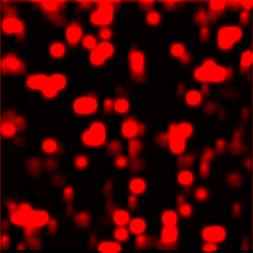

21


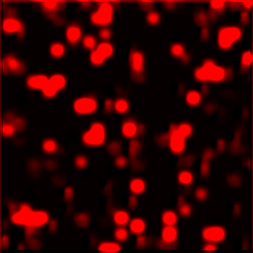

22


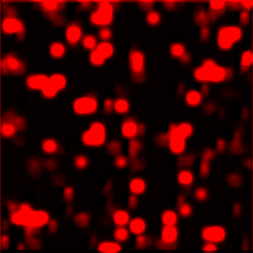

23


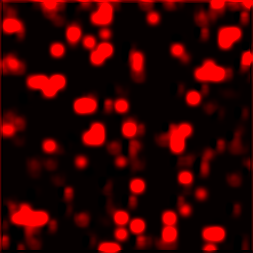

24


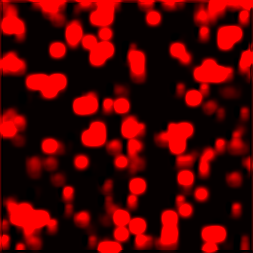

25


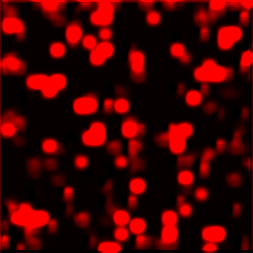

26


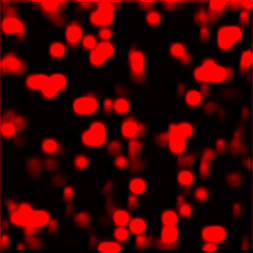

27


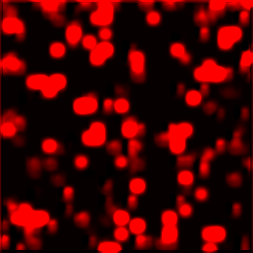

28


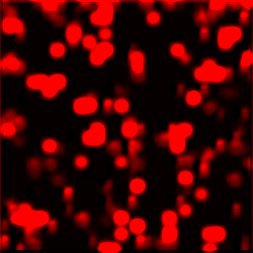

29


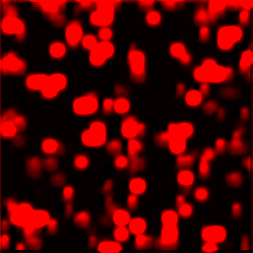

Set[1] Epoch [120/10000] Loss: 3.8758 i:1199
Set[1] Epoch [140/10000] Loss: 3.8661 i:1399
Set[1] Epoch [160/10000] Loss: 3.6516 i:1599
Set[1] Epoch [180/10000] Loss: 3.6476 i:1799
Set[1] Epoch [200/10000] Loss: 3.4375 i:1999
20


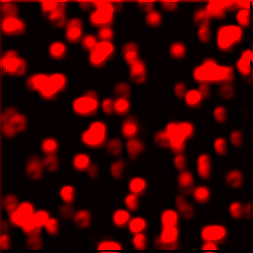

21


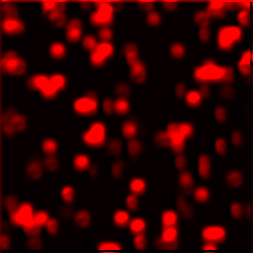

22


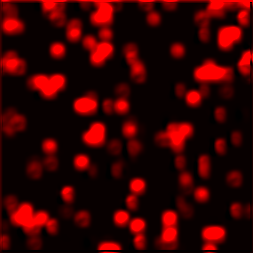

23


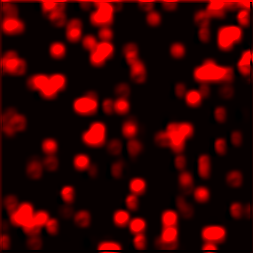

24


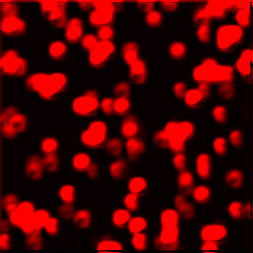

25


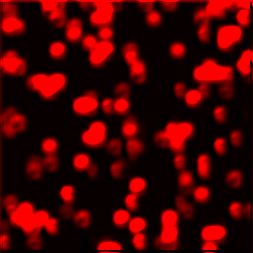

26


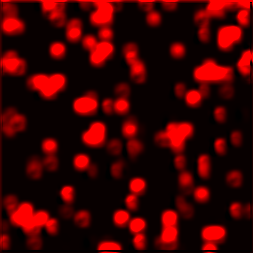

27


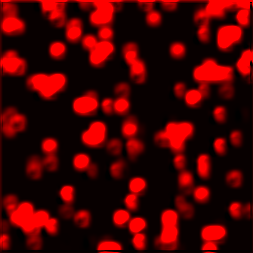

28


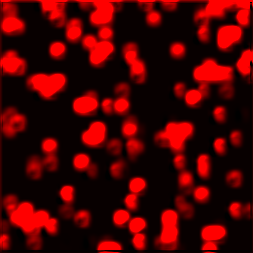

29


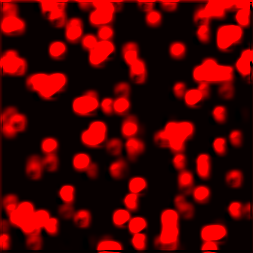

Set[1] Epoch [220/10000] Loss: 3.7242 i:2199
Set[1] Epoch [240/10000] Loss: 3.5232 i:2399
Set[1] Epoch [260/10000] Loss: 3.7537 i:2599
Set[1] Epoch [280/10000] Loss: 3.6609 i:2799
Set[1] Epoch [300/10000] Loss: 3.4927 i:2999
20


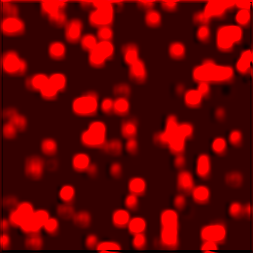

21


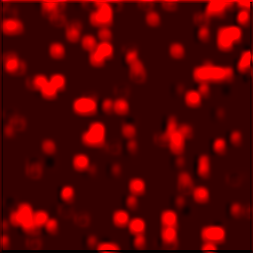

22


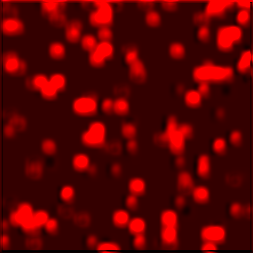

23


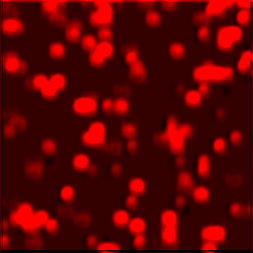

24


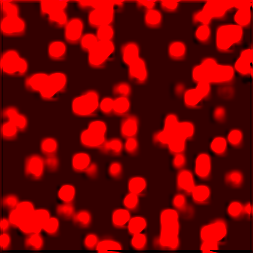

25


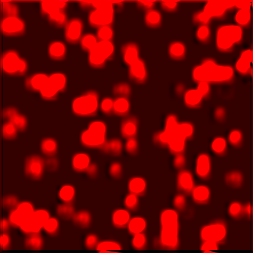

26


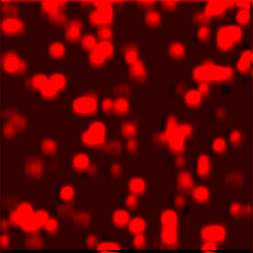

27


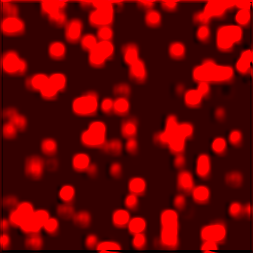

28


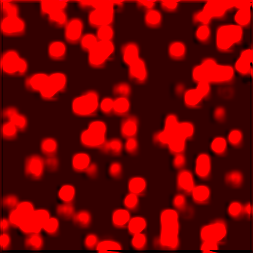

29


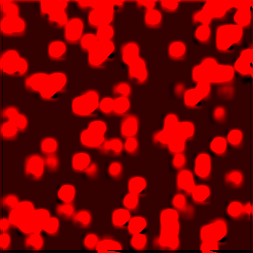

Set[1] Epoch [320/10000] Loss: 3.4944 i:3199
Set[1] Epoch [340/10000] Loss: 3.1199 i:3399
Set[1] Epoch [360/10000] Loss: 3.0085 i:3599
Set[1] Epoch [380/10000] Loss: 3.0619 i:3799
Set[1] Epoch [400/10000] Loss: 2.8783 i:3999
20


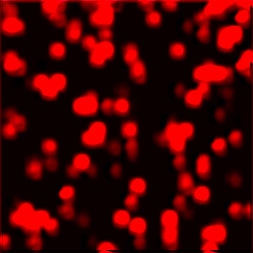

21


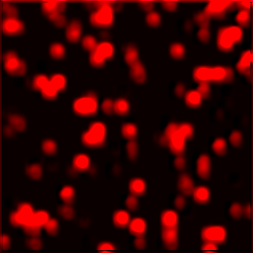

22


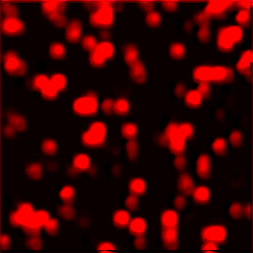

23


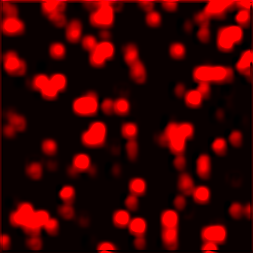

24


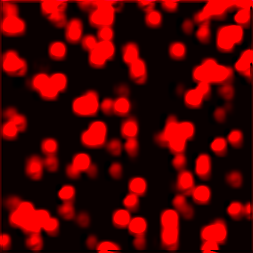

25


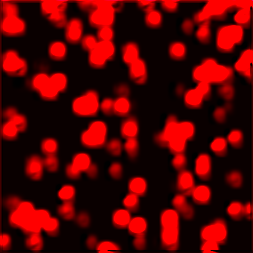

26


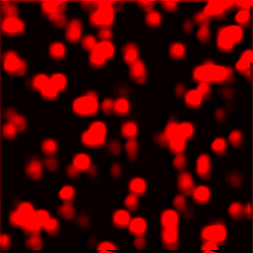

27


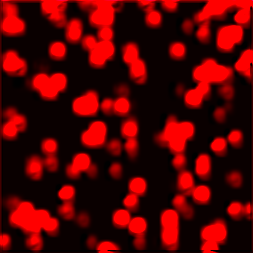

28


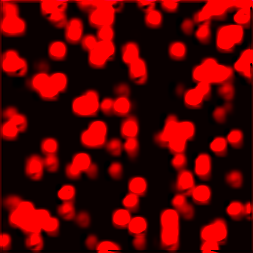

29


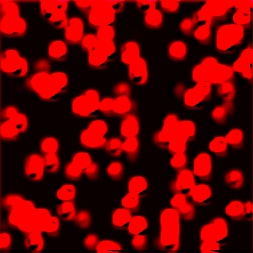

Set[1] Epoch [420/10000] Loss: 2.9756 i:4199
Set[1] Epoch [440/10000] Loss: 2.8333 i:4399
Set[1] Epoch [460/10000] Loss: 2.8829 i:4599
Set[1] Epoch [480/10000] Loss: 2.8857 i:4799
Set[1] Epoch [500/10000] Loss: 2.6230 i:4999
20


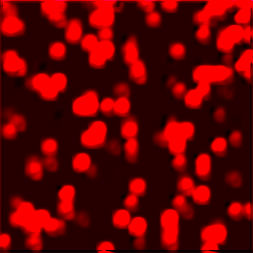

21


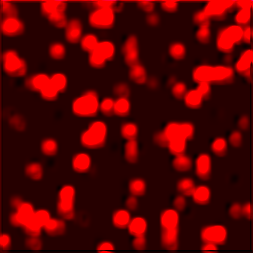

22


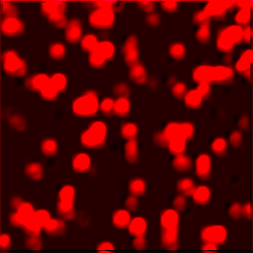

23


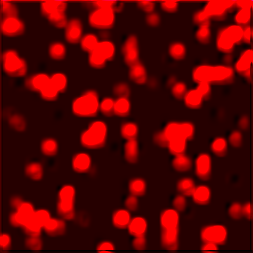

24


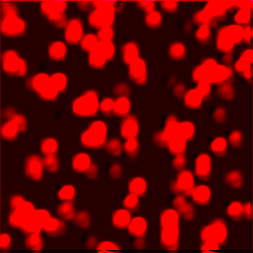

25


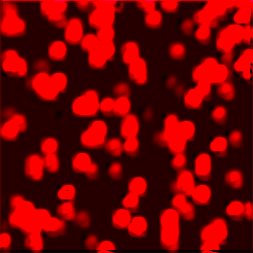

26


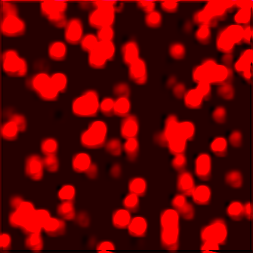

27


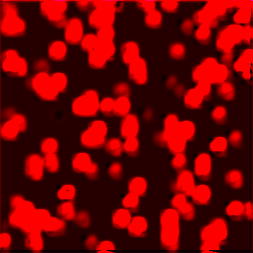

28


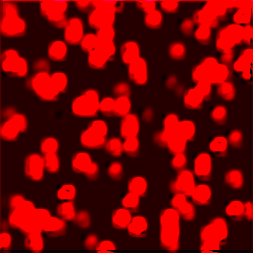

29


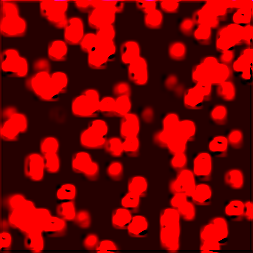

Set[1] Epoch [520/10000] Loss: 2.3775 i:5199
Set[1] Epoch [540/10000] Loss: 2.3031 i:5399
Set[1] Epoch [560/10000] Loss: 2.2362 i:5599
Set[1] Epoch [580/10000] Loss: 2.0469 i:5799
Set[1] Epoch [600/10000] Loss: 1.9350 i:5999
20


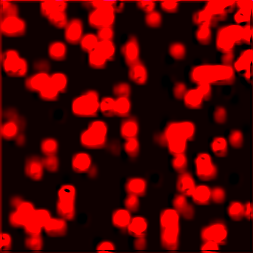

21


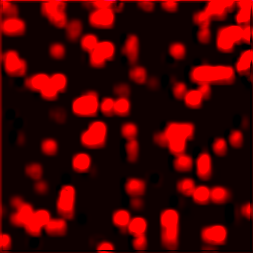

22


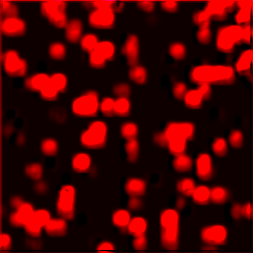

23


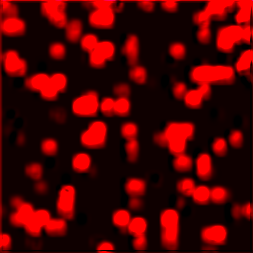

24


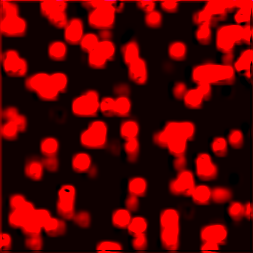

25


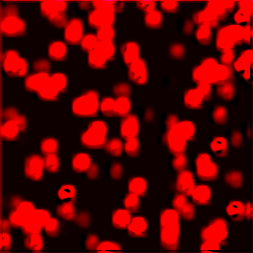

26


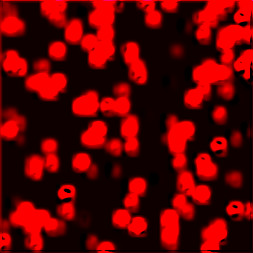

27


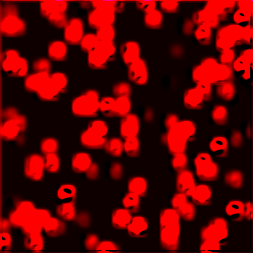

28


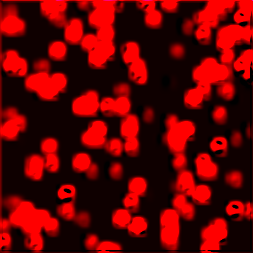

29


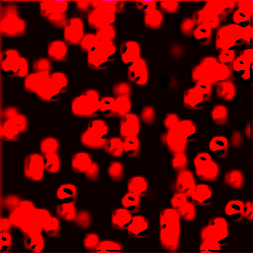

Set[1] Epoch [620/10000] Loss: 1.9048 i:6199
Set[1] Epoch [640/10000] Loss: 1.8124 i:6399
Set[1] Epoch [660/10000] Loss: 1.6848 i:6599
Set[1] Epoch [680/10000] Loss: 1.5527 i:6799
Set[1] Epoch [700/10000] Loss: 1.4401 i:6999
20


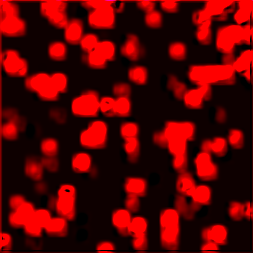

21


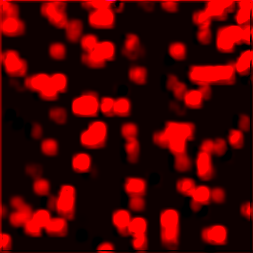

22


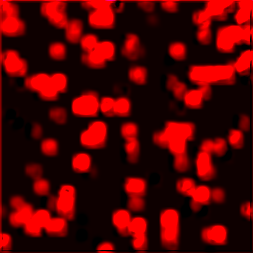

23


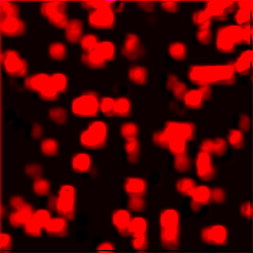

24


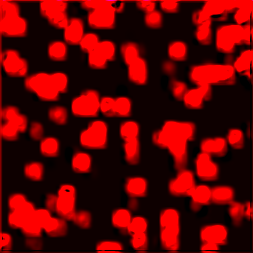

25


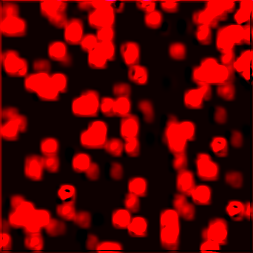

26


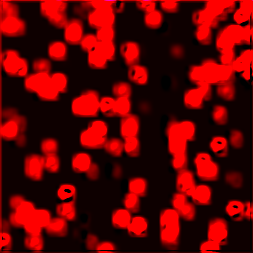

27


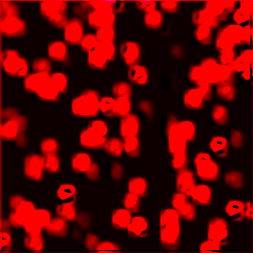

28


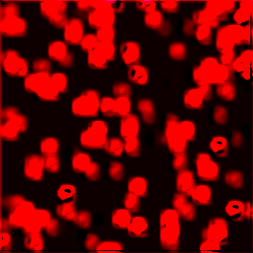

29


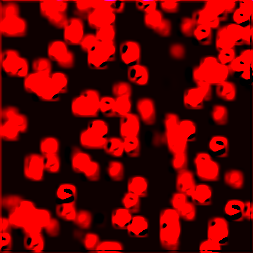

Set[1] Epoch [720/10000] Loss: 1.4338 i:7199
Set[1] Epoch [740/10000] Loss: 1.5447 i:7399
Set[1] Epoch [760/10000] Loss: 1.6335 i:7599
Set[1] Epoch [780/10000] Loss: 1.3633 i:7799
Set[1] Epoch [800/10000] Loss: 1.3781 i:7999
20


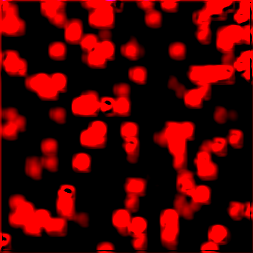

21


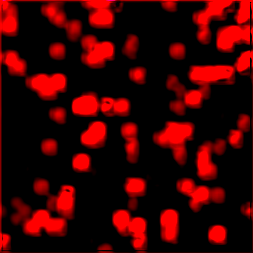

22


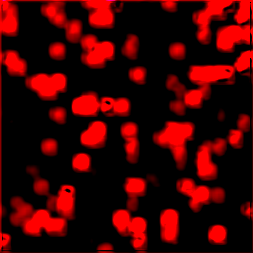

23


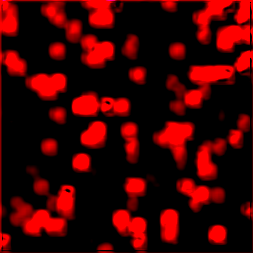

24


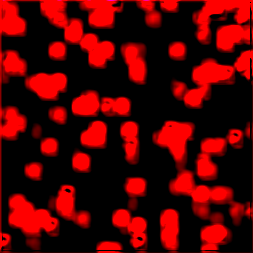

25


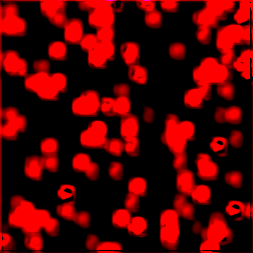

26


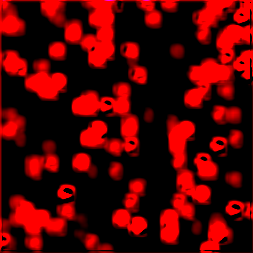

27


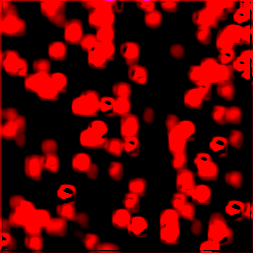

28


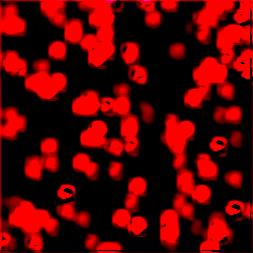

29


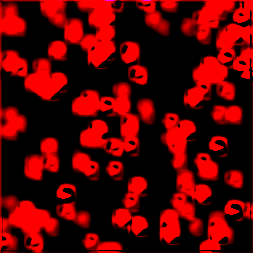

Set[1] Epoch [820/10000] Loss: 1.2848 i:8199
Set[1] Epoch [840/10000] Loss: 1.3622 i:8399
Set[1] Epoch [860/10000] Loss: 1.1475 i:8599
Set[1] Epoch [880/10000] Loss: 1.0852 i:8799
Set[1] Epoch [900/10000] Loss: 1.1255 i:8999
20


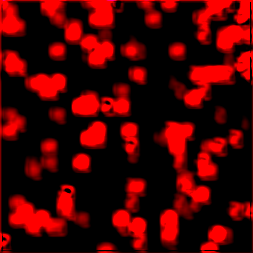

21


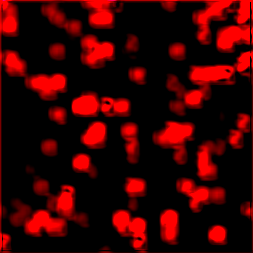

22


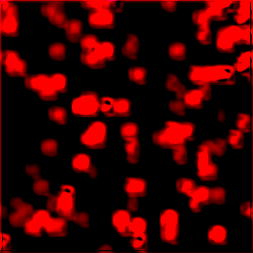

23


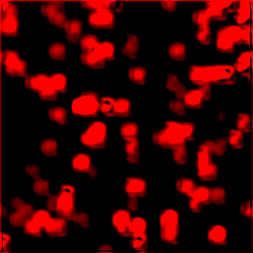

24


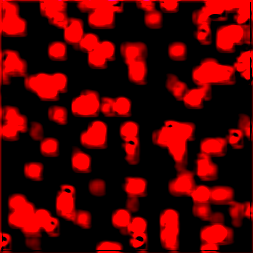

25


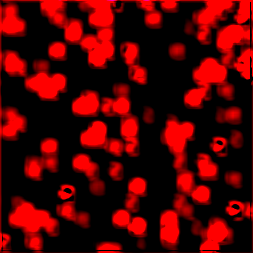

26


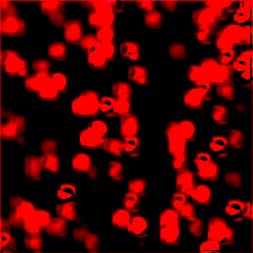

27


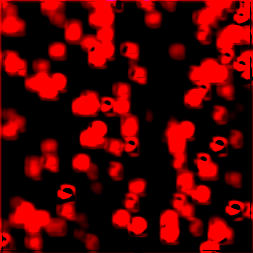

28


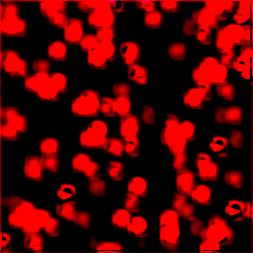

29


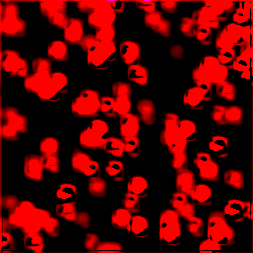

Set[1] Epoch [920/10000] Loss: 0.9022 i:9199
Set[1] Epoch [940/10000] Loss: 0.8560 i:9399
Set[1] Epoch [960/10000] Loss: 1.0645 i:9599
Set[1] Epoch [980/10000] Loss: 0.8387 i:9799
Set[1] Epoch [1000/10000] Loss: 0.8626 i:9999
20


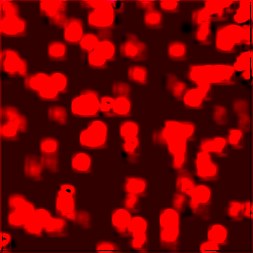

21


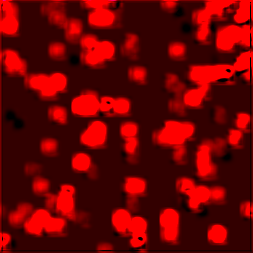

22


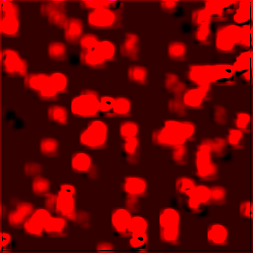

23


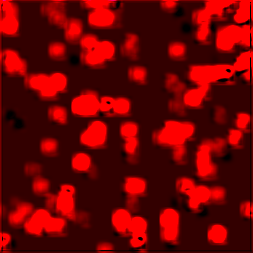

24


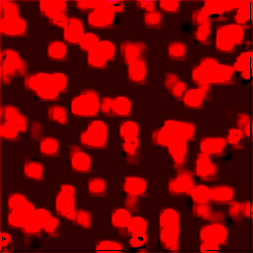

25


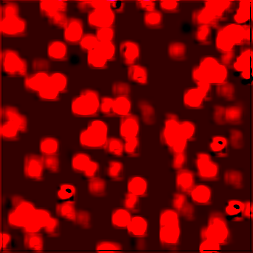

26


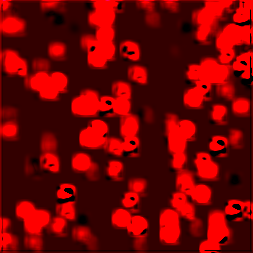

27


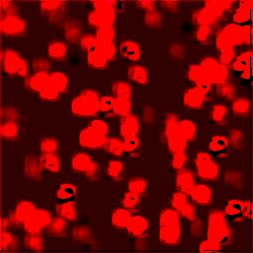

28


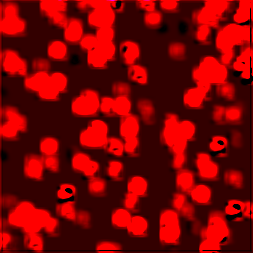

29


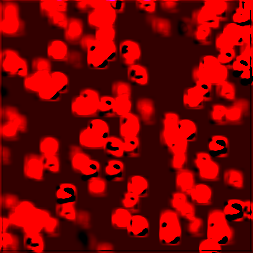

Set[1] Epoch [1020/10000] Loss: 0.9237 i:10199
Set[1] Epoch [1040/10000] Loss: 0.8282 i:10399
Set[1] Epoch [1060/10000] Loss: 0.8832 i:10599
Set[1] Epoch [1080/10000] Loss: 0.8322 i:10799
Set[1] Epoch [1100/10000] Loss: 0.6807 i:10999
20


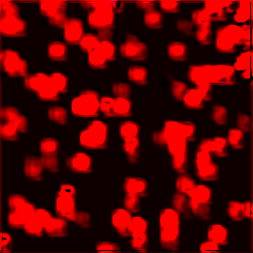

21


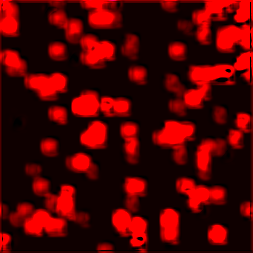

22


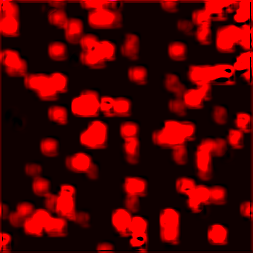

23


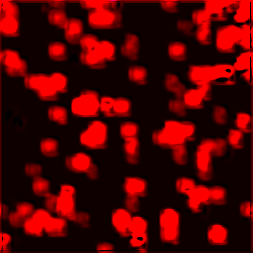

24


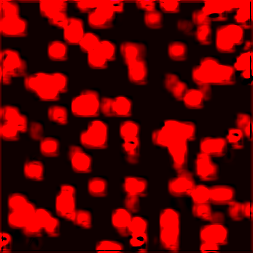

25


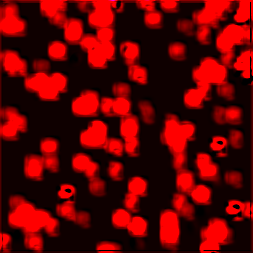

26


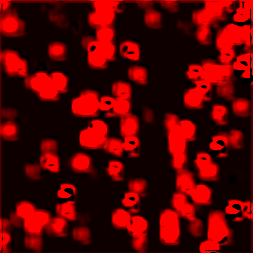

27


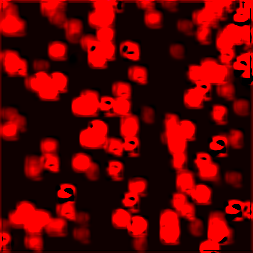

28


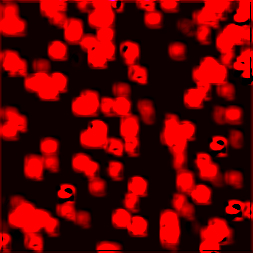

29


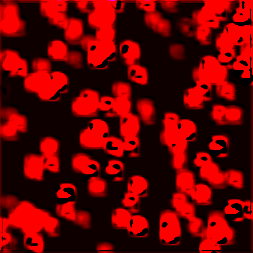

Set[1] Epoch [1120/10000] Loss: 0.7273 i:11199
Set[1] Epoch [1140/10000] Loss: 0.7229 i:11399
Set[1] Epoch [1160/10000] Loss: 0.6826 i:11599
Set[1] Epoch [1180/10000] Loss: 0.8006 i:11799
Set[1] Epoch [1200/10000] Loss: 0.6383 i:11999
20


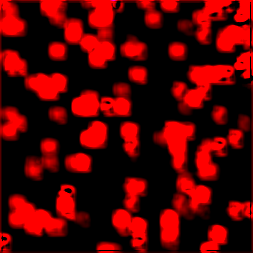

21


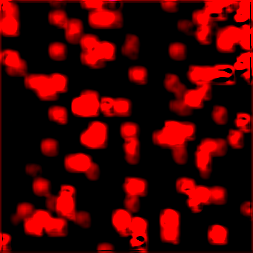

22


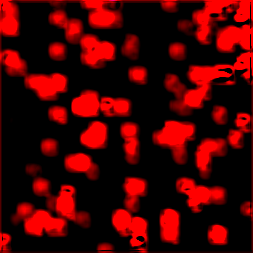

23


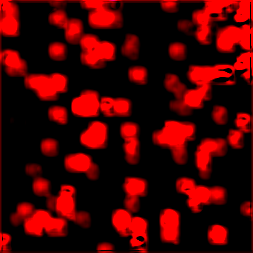

24


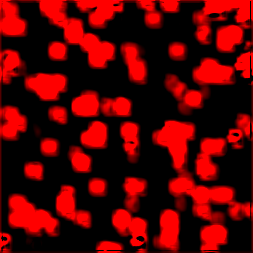

25


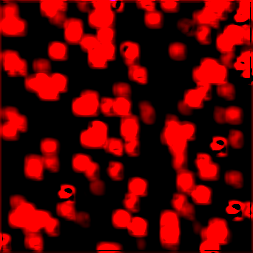

26


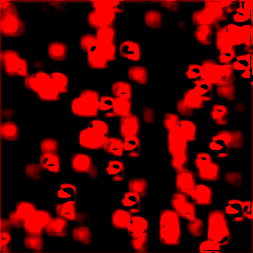

27


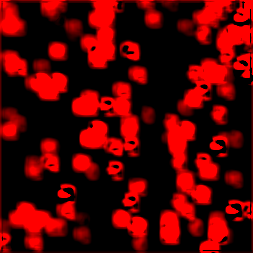

28


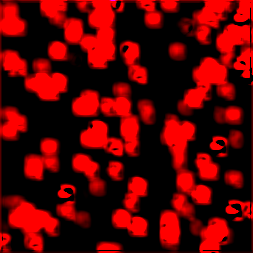

29


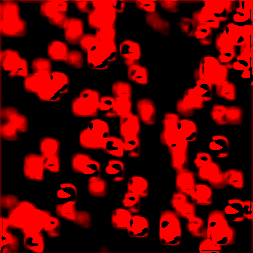

Set[1] Epoch [1220/10000] Loss: 0.7280 i:12199
Set[1] Epoch [1240/10000] Loss: 0.5189 i:12399
Set[1] Epoch [1260/10000] Loss: 0.5623 i:12599
Set[1] Epoch [1280/10000] Loss: 0.5466 i:12799
Set[1] Epoch [1300/10000] Loss: 0.5302 i:12999
20


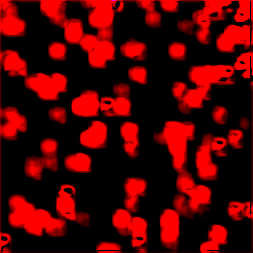

21


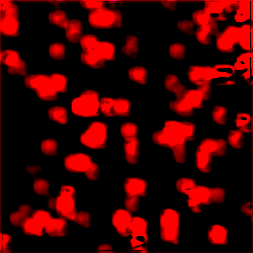

22


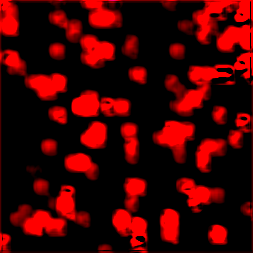

23


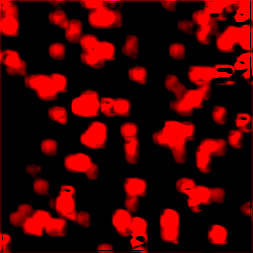

24


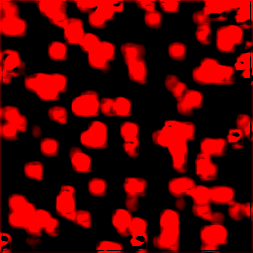

25


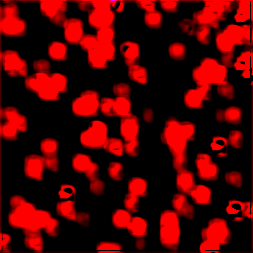

26


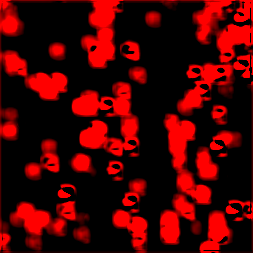

27


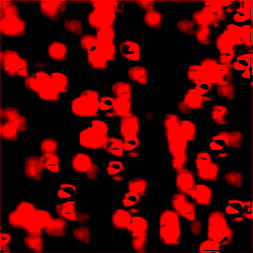

28


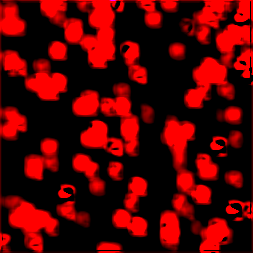

29


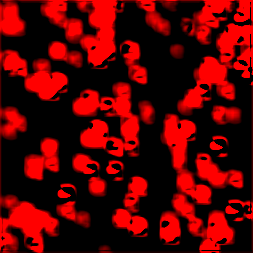

Set[1] Epoch [1320/10000] Loss: 0.4966 i:13199
Set[1] Epoch [1340/10000] Loss: 0.4897 i:13399
Set[1] Epoch [1360/10000] Loss: 0.5051 i:13599
Set[1] Epoch [1380/10000] Loss: 0.4731 i:13799
Set[1] Epoch [1400/10000] Loss: 0.4747 i:13999
20


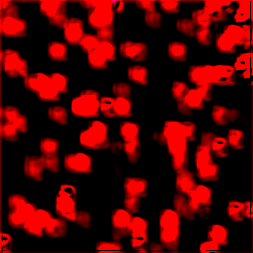

21


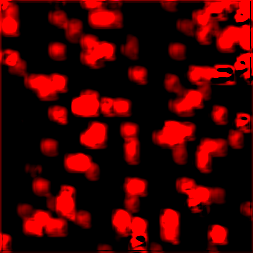

22


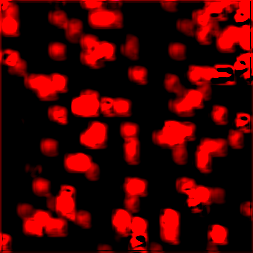

23


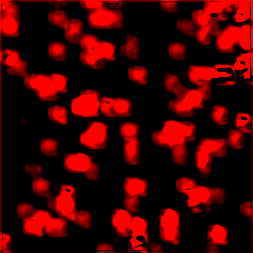

24


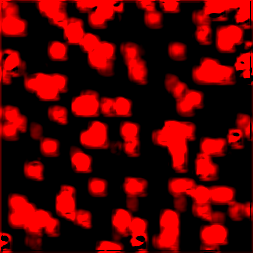

25


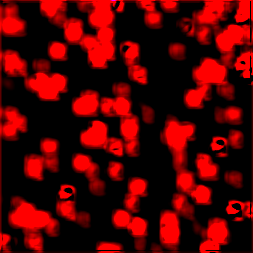

26


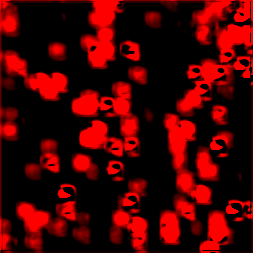

27


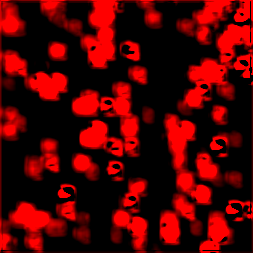

28


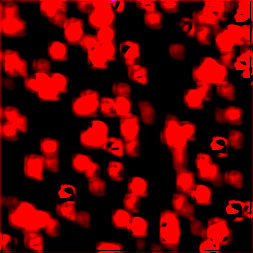

29


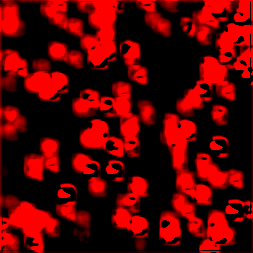

Set[1] Epoch [1420/10000] Loss: 0.4368 i:14199
Set[1] Epoch [1440/10000] Loss: 0.4412 i:14399
Set[1] Epoch [1460/10000] Loss: 0.3896 i:14599
Set[1] Epoch [1480/10000] Loss: 0.4152 i:14799
Set[1] Epoch [1500/10000] Loss: 0.3501 i:14999
20


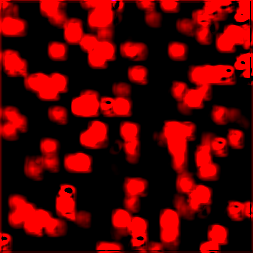

21


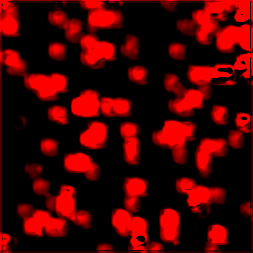

22


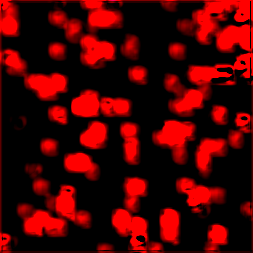

23


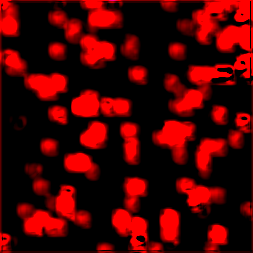

24


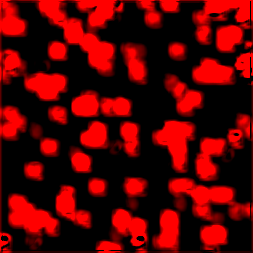

25


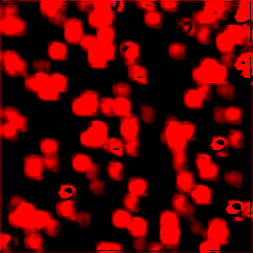

26


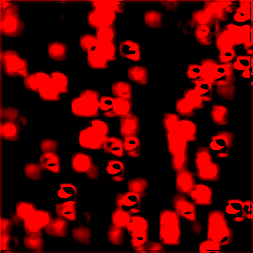

27


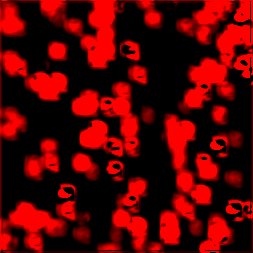

28


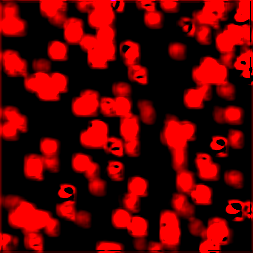

29


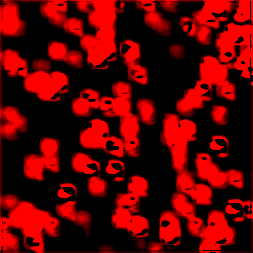

Set[1] Epoch [1520/10000] Loss: 0.3578 i:15199
Set[1] Epoch [1540/10000] Loss: 0.3684 i:15399
Set[1] Epoch [1560/10000] Loss: 0.3658 i:15599
Set[1] Epoch [1580/10000] Loss: 0.4600 i:15799
Set[1] Epoch [1600/10000] Loss: 0.3035 i:15999
20


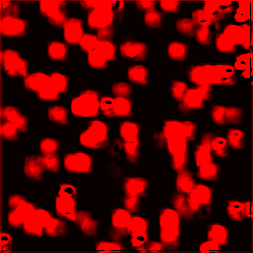

21


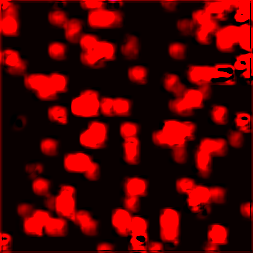

22


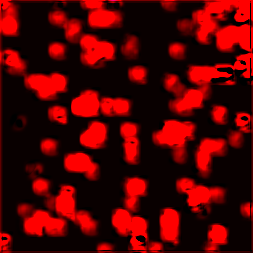

23


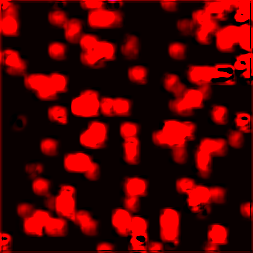

24


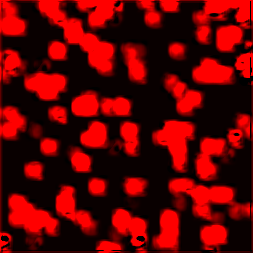

25


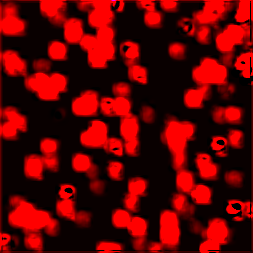

26


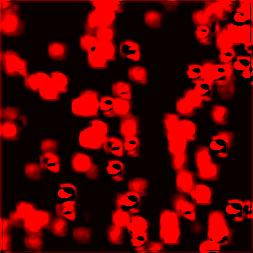

27


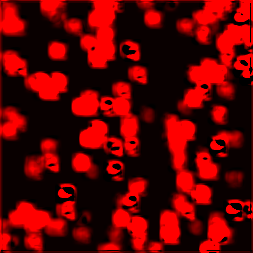

28


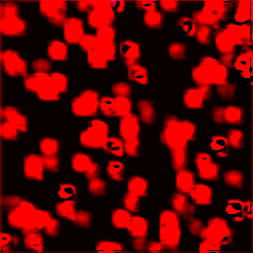

29


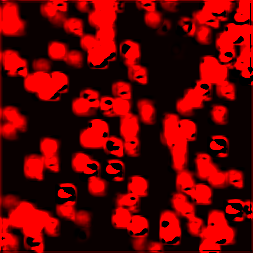

Set[1] Epoch [1620/10000] Loss: 0.3395 i:16199
Set[1] Epoch [1640/10000] Loss: 0.3263 i:16399
Set[1] Epoch [1660/10000] Loss: 0.2970 i:16599
Set[1] Epoch [1680/10000] Loss: 0.3509 i:16799
Set[1] Epoch [1700/10000] Loss: 0.2832 i:16999
20


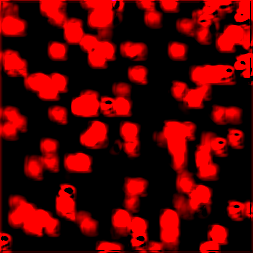

21


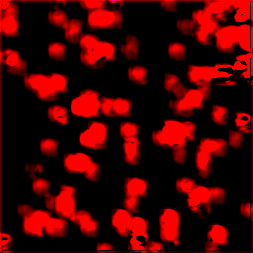

22


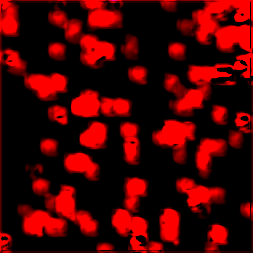

23


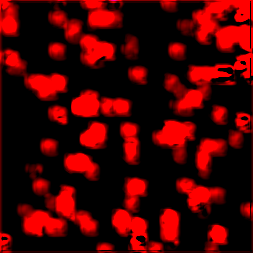

24


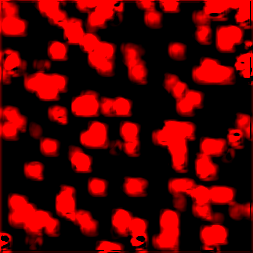

25


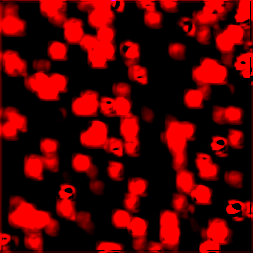

26


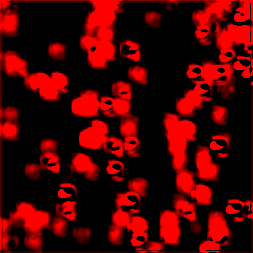

27


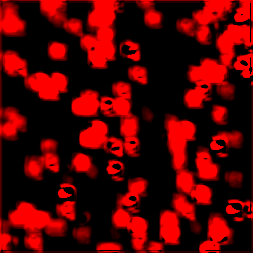

28


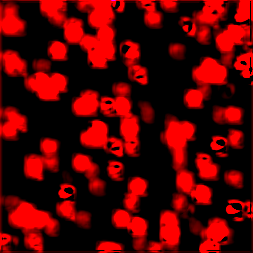

29


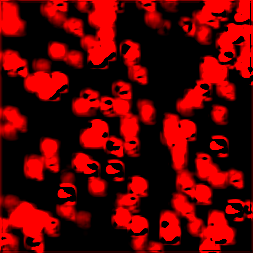

Set[1] Epoch [1720/10000] Loss: 0.3027 i:17199
Set[1] Epoch [1740/10000] Loss: 0.3373 i:17399
Set[1] Epoch [1760/10000] Loss: 0.2994 i:17599
Set[1] Epoch [1780/10000] Loss: 0.2902 i:17799
Set[1] Epoch [1800/10000] Loss: 0.3116 i:17999
20


In [0]:
NetEpochs = 10000
start, stop, step = 20, 30,1
Dataset = [x for x in range(start,stop,step)]
# Dataset = [0]
done = False
for epoch in range(NetEpochs):
    
    seta = 0
    for data in Dataset:
      # print(empty(data))
      p = empty(data,start,step) 
      # p2 = empty2(data)
      tdata = torch.Tensor([p]).cuda()
      # tdata2 = torch.Tensor([p2]).cuda()

      X = model(tdata,sig=True)
      # print(X)
      # for param in cnn.parameters():
      #   param.requires_grad = False
      X_CNN = cnn(X)
      # print(X_CNN.grad_fn)
      # print(X.grad_fn) 
      # print(X_CNN.grad_fn)
      # print(X_CNN)
      #img = X[0]
      #img = img.detach().cpu().numpy()
      #img = np.transpose(img,(2,1,0))
      # print(img)

      # break
      # cv2_imshow(img*255)
      # X_CNN.grad = X.grad
      # print(torch.max(X_CNN))
      # print()
      # break
      # print(X.shape)
      # print(X_CNN,data)
      # print(torch.max(X))
      # print(X_CNN.grad())
      # X_CNN.grad_fn= X.grad_fn
      # print(X_CNN)
      loss = criterion(X_CNN,torch.tensor([data]).cuda())
      # print(loss.grad_fn)
      
      # loss = criterion(X_CNN,tdata2)
      loss.backward()
      optimizer.step()
      # print(i)
      if (i+1) % 200 == 0:
          seta+=1
          print ('Set[%d] Epoch [%d/%d] Loss: %.4f i:%d' %(seta,epoch+1, NetEpochs, loss.item(),i))
      if (h+1)%1000 == 0:
        num+=1
        # img = X[0]
        # img = img.detach().cpu().numpy()
        # img = np.transpose(img,(2,1,0))
        # cv2_imshow(img*255)
        for data in Dataset:
          # print(empty(data))
          p = empty(data,start,step) 
          tdata = torch.Tensor([p]).cuda()
          X = model(tdata)
          # print(X)
          X_CNN = cnn(X)
          img = X[0]
          img = img.detach().cpu().numpy()
          img = np.transpose(img,(2,1,0))
          img*=255
          img[img<0]=0
          img[img>255]=255
          print(data)
          cv2_imshow(img)
          if(save):
            os.system("mkdir 'drive/My Drive/ReverseCNN/"+folder+str(num)+"'")
            cv2.imwrite("drive/My Drive/ReverseCNN/"+folder+str(num)+"/"+str(data)+".jpg",img)
        if(save):
          torch.save(model.state_dict(), "drive/My Drive/ReverseCNN/"+folder+str(num)+"/model.pth'") 
      h+=1
      if((loss.item())<0.1):
        k+=1
        if(k>5):
          done = True
          break
      else:
        k=0
      i+=1
    if(done):
      break

In [0]:
X_CNN.shape

torch.Size([1, 1000])

In [0]:
tdata.shape

torch.Size([1, 10])

In [0]:
for param in model.parameters():
  print(param.data.mean())
  print(param.grad.mean())
  print()
  # break

tensor(-0.0259, device='cuda:0')
tensor(-1.7281, device='cuda:0')

tensor(-0.0489, device='cuda:0')
tensor(-17.2805, device='cuda:0')

tensor(-0.0382, device='cuda:0')
tensor(0.0867, device='cuda:0')

tensor(-0.0476, device='cuda:0')
tensor(1.9023, device='cuda:0')

tensor(-0.0147, device='cuda:0')
tensor(0.0617, device='cuda:0')

tensor(-0.1071, device='cuda:0')
tensor(0.8519, device='cuda:0')

tensor(-0.0544, device='cuda:0')
tensor(0.0166, device='cuda:0')

tensor(-0.1230, device='cuda:0')
tensor(1.3799, device='cuda:0')

tensor(-0.0507, device='cuda:0')
tensor(0.0098, device='cuda:0')

tensor(-0.1114, device='cuda:0')
tensor(1.6133, device='cuda:0')

tensor(-0.0478, device='cuda:0')
tensor(0.0059, device='cuda:0')

tensor(-0.1177, device='cuda:0')
tensor(2.1735, device='cuda:0')

tensor(-0.0481, device='cuda:0')
tensor(0.0032, device='cuda:0')

tensor(-0.1018, device='cuda:0')
tensor(0.9877, device='cuda:0')

tensor(-0.0383, device='cuda:0')
tensor(0.0019, device='cuda:0')

tensor(

In [0]:
torch.save(model.state_dict(), "drive/My Drive/AlexNetNew/model.pth'") 

In [0]:
!mkdir "drive/My Drive/AlexNetNew/"

Set[1] Epoch [2/10000] Loss: 1.6757 i:68559
Set[1] Epoch [3/10000] Loss: 3.6796 i:68569
Set[1] Epoch [4/10000] Loss: 4.8812 i:68579
Set[1] Epoch [5/10000] Loss: 1.5848 i:68589
Set[1] Epoch [7/10000] Loss: 1.6672 i:68599
Set[1] Epoch [8/10000] Loss: 3.7002 i:68609
Set[1] Epoch [9/10000] Loss: 4.8502 i:68619
Set[1] Epoch [10/10000] Loss: 1.6445 i:68629
Set[1] Epoch [12/10000] Loss: 1.5871 i:68639
Set[1] Epoch [13/10000] Loss: 3.7038 i:68649
Set[1] Epoch [14/10000] Loss: 4.8135 i:68659
Set[1] Epoch [15/10000] Loss: 1.7017 i:68669
Set[1] Epoch [17/10000] Loss: 1.5456 i:68679
Set[1] Epoch [18/10000] Loss: 3.6848 i:68689
Set[1] Epoch [19/10000] Loss: 4.5660 i:68699
Set[1] Epoch [20/10000] Loss: 1.6734 i:68709
Set[1] Epoch [22/10000] Loss: 1.5339 i:68719
Set[1] Epoch [23/10000] Loss: 3.8538 i:68729
Set[1] Epoch [24/10000] Loss: 4.4934 i:68739
Set[1] Epoch [25/10000] Loss: 1.6576 i:68749
Set[1] Epoch [27/10000] Loss: 1.5067 i:68759
Set[1] Epoch [28/10000] Loss: 3.7847 i:68769
Set[1] Epoch [29/

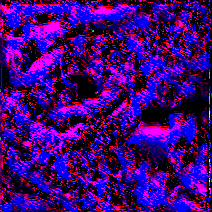

Set[1] Epoch [58/10000] Loss: 3.2656 i:69009
Set[1] Epoch [59/10000] Loss: 4.2447 i:69019
Set[1] Epoch [60/10000] Loss: 2.1072 i:69029
Set[1] Epoch [62/10000] Loss: 1.6133 i:69039
Set[1] Epoch [63/10000] Loss: 3.1846 i:69049
Set[1] Epoch [64/10000] Loss: 4.0448 i:69059
Set[1] Epoch [65/10000] Loss: 2.1485 i:69069
Set[1] Epoch [67/10000] Loss: 1.6351 i:69079
Set[1] Epoch [68/10000] Loss: 3.2085 i:69089
Set[1] Epoch [69/10000] Loss: 3.7064 i:69099
Set[1] Epoch [70/10000] Loss: 2.0375 i:69109
Set[1] Epoch [72/10000] Loss: 1.6765 i:69119
Set[1] Epoch [73/10000] Loss: 3.2432 i:69129
Set[1] Epoch [74/10000] Loss: 3.7062 i:69139
Set[1] Epoch [75/10000] Loss: 2.0935 i:69149
Set[1] Epoch [77/10000] Loss: 1.7081 i:69159
Set[1] Epoch [78/10000] Loss: 3.0247 i:69169
Set[1] Epoch [79/10000] Loss: 3.7195 i:69179
Set[1] Epoch [80/10000] Loss: 2.0291 i:69189
Set[1] Epoch [82/10000] Loss: 1.8417 i:69199
Set[1] Epoch [83/10000] Loss: 2.8665 i:69209
Set[1] Epoch [84/10000] Loss: 3.8990 i:69219
Set[1] Epo

KeyboardInterrupt: ignored

In [0]:
NetEpochs = 10000
Dataset = [x for x in range(10,50,5)]
# Dataset = [0]

for epoch in range(NetEpochs):
    
    seta = 0
    for data in Dataset:
      # print(empty(data))
      p = empty(data) 
      tdata = torch.Tensor([p]).cuda()
      X = model(tdata,sig=False)
      # print(X)
      for param in cnn.parameters():
        param.requires_grad = False
      X_CNN = cnn(X)
      # print(X_CNN.grad_fn)
      # print(X.grad_fn) 
      # print(X_CNN.grad_fn)
      # print(X_CNN)
      #img = X[0]
      #img = img.detach().cpu().numpy()
      #img = np.transpose(img,(2,1,0))
      # print(img)

      # break
      # cv2_imshow(img*255)
      # X_CNN.grad = X.grad
      # print(torch.max(X_CNN))
      # print()
      # break
      # print(X.shape)
      # print(X_CNN,data)
      # print(torch.max(X))
      # print(X_CNN.grad())
      # X_CNN.grad_fn= X.grad_fn
      # print(X_CNN)
      loss = criterion(X_CNN,torch.tensor([data]).cuda())
      # print(loss.grad_fn)
      
      # loss = criterion(X_CNN,tdata)
      loss.backward()
      optimizer.step()
      # print(i)
      if (i+1) % 10 == 0:
          seta+=1
          print ('Set[%d] Epoch [%d/%d] Loss: %.4f i:%d' %(seta,epoch+1, NetEpochs, loss.item(),i))
      if (h+1)%1000 == 0:
        num+=1
        img = X[0]
        img = img.detach().cpu().numpy()
        img = np.transpose(img,(2,1,0))
        cv2_imshow(img*255)
        for data in Dataset:
          # print(empty(data))
          p = empty(data)
          tdata = torch.Tensor([p]).cuda()
          X = model(tdata)
          # print(X)
          X_CNN = cnn(X)
          img = X[0]
          img = img.detach().cpu().numpy()
          img = np.transpose(img,(2,1,0))
          img*=300
          img[img<0]=0
          img[img>255]=255
          os.system("mkdir 'drive/My Drive/ReverseCNN/"+folder+str(num)+"'")
          cv2.imwrite("drive/My Drive/ReverseCNN/"+folder+str(num)+"/"+str(data)+".jpg",img)
        torch.save(model.state_dict(), "drive/My Drive/ReverseCNN/"+folder+str(num)+"/model.pth'") 
      h+=1
      if((loss.item())<0.1):
        k+=1
        if(k>20):
          break
      else:
        k=0
      i+=1

10


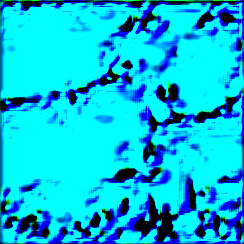

10


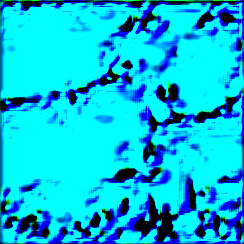

10


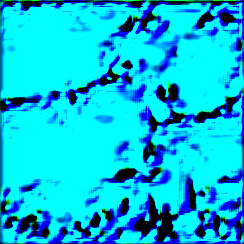

10


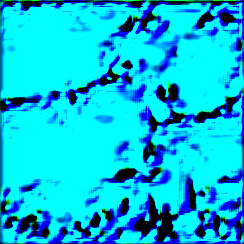

10


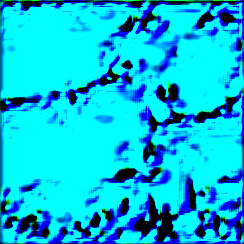

10


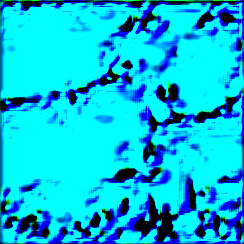

10


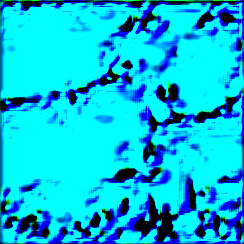

10


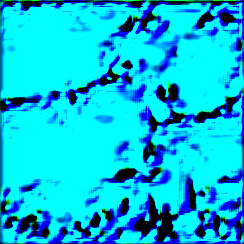

10


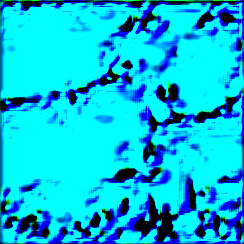

10


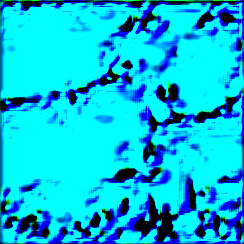

In [0]:
for data in Dataset:
    # print(empty(data))
    p = empty(data)
    tdata = torch.Tensor([p]).cuda()
    X = model(tdata)
    # print(X)
    X_CNN = cnn(X)
    img = X[0]
    img = img.detach().cpu().numpy()
    img = np.transpose(img,(2,1,0))
    # print(img*-100)
    # break
    img*=255
    img[img<0]=0
    img[img>255]=255
    print(data)
    cv2_imshow(img)
    # cv2.imwrite("Four/"+str(data)+".jpg",img)

In [0]:
print(torch.max(X))

tensor(0.7154, device='cuda:0', grad_fn=<MaxBackward1>)


In [0]:
img

NameError: ignored

In [0]:
for data in Dataset:
    # print(empty(data))
    p = empty(data)
    tdata = torch.Tensor([p]).cuda()
    X = model(tdata)
    # print(X)
    X_CNN = cnn(X)
    img = X[0]
    img = img.detach().cpu().numpy()
    img = np.transpose(img,(2,1,0))
    img*=300
    # img/=255
    
    # print(img)
    # img/=10
    img[img<0]=0
    img[img>255]=255
    print(classId[data])
    # print(classes[data])
    cv2_imshow(img)
    # cv2.imwrite("Four/"+str(data)+".jpg",img)

In [0]:
num = 10002
for data in Dataset:
          # print(empty(data))
          p = empty(data)
          tdata = torch.Tensor([p]).cuda()
          X = model(tdata)
          # print(X)
          X_CNN = cnn(X)
          img = X[0]
          img = img.detach().cpu().numpy()
          img = np.transpose(img,(2,1,0))
          img*=300
          img[img<0]=0
          img[img>255]=255
          os.system("mkdir 'drive/My Drive/ReverseCNN/"+str(num)+"'")
          cv2.imwrite("drive/My Drive/ReverseCNN/"+str(num)+"/"+str(data)+".jpg",img)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2973: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


In [0]:
!mkdir 'drive/My Drive/ReverseCNN/10001'

In [0]:
for data in Dataset:
    # print(empty(data))
    p = empty(data)
    tdata = torch.Tensor([p]).cuda()
    X = model(tdata)
    # print(X)
    X_CNN = cnn(X)
    img = X[0]
    img = img.detach().cpu().numpy()
    img = np.transpose(img,(2,1,0))
    img*=300
    img[img<0]=0
    img[img>255]=255
    cv2.imwrite(str(num)+"/"+str(data)+".jpg",img)

'goldfish, Carassius auratus'

In [0]:
img

array([[[ 0.        ,  3.1141372 ,  0.        ],
        [ 0.        , 14.832142  ,  0.        ],
        [ 0.        , 19.21349   ,  0.        ],
        ...,
        [ 0.        ,  7.368249  ,  6.14215   ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ]],

       [[ 0.        ,  1.0617164 ,  0.        ],
        [ 0.        , 20.541986  ,  0.        ],
        [10.268585  , 27.37024   ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  4.3304715 ],
        [ 0.        ,  0.        ,  3.0919714 ],
        [ 0.        ,  0.        ,  0.        ]],

       [[ 5.9512987 ,  5.706984  ,  0.        ],
        [14.311438  , 31.255552  ,  0.        ],
        [28.998894  , 30.04028   ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  6.458892  ],
        [ 0.        ,  0.        ,  0.7010953 ],
        [ 0.        ,  0.        ,  0.        ]],

       ...,

       [[ 4.844418  ,  0.        ,  6.6506705 ],
        [ 8